<h1>Conteúdo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sobre-tratamento-de-dados" data-toc-modified-id="Sobre-tratamento-de-dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sobre tratamento de dados</a></span></li><li><span><a href="#Scipy" data-toc-modified-id="Scipy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scipy</a></span><ul class="toc-item"><li><span><a href="#Localização-de-picos:-find_peaks_cwt" data-toc-modified-id="Localização-de-picos:-find_peaks_cwt-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Localização de picos: find_peaks_cwt</a></span></li><li><span><a href="#Alisamento-de-dados:-savgol_filter" data-toc-modified-id="Alisamento-de-dados:-savgol_filter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Alisamento de dados: savgol_filter</a></span></li><li><span><a href="#Ajuste-de-curvas-arbitrárias:-curve_fit" data-toc-modified-id="Ajuste-de-curvas-arbitrárias:-curve_fit-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ajuste de curvas arbitrárias: curve_fit</a></span></li><li><span><a href="#Junção-de-função-de-ajuste-com-uncertainties" data-toc-modified-id="Junção-de-função-de-ajuste-com-uncertainties-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Junção de função de ajuste com uncertainties</a></span></li><li><span><a href="#Integração" data-toc-modified-id="Integração-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Integração</a></span></li><li><span><a href="#Manipulação-de-imagens:-scikit-image" data-toc-modified-id="Manipulação-de-imagens:-scikit-image-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Manipulação de imagens: scikit-image</a></span></li></ul></li><li><span><a href="#lmfit" data-toc-modified-id="lmfit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>lmfit</a></span><ul class="toc-item"><li><span><a href="#Ajuste-de-duas-curvas-com-o-mesmo-conjunto-de-parâmetros" data-toc-modified-id="Ajuste-de-duas-curvas-com-o-mesmo-conjunto-de-parâmetros-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ajuste de duas curvas com o mesmo conjunto de parâmetros</a></span></li></ul></li><li><span><a href="#Expressões-regulares-(regex)" data-toc-modified-id="Expressões-regulares-(regex)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Expressões regulares (regex)</a></span><ul class="toc-item"><li><span><a href="#Como-construir-uma-regex" data-toc-modified-id="Como-construir-uma-regex-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Como construir uma regex</a></span></li></ul></li><li><span><a href="#Outras-ferramentas-de-visualização" data-toc-modified-id="Outras-ferramentas-de-visualização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outras ferramentas de visualização</a></span><ul class="toc-item"><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Seaborn</a></span></li><li><span><a href="#Altair" data-toc-modified-id="Altair-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Altair</a></span></li></ul></li></ul></div>

# Sobre tratamento de dados

Até agora vimos bastante coisa sobre a sintaxe do Python, sobre alguns conceitos básicos de programação como condicionais e loops, e vimos como carregar dados com pandas, realizar operações matemáticas mais facilmente com numpy, e plotar gráficos com o pyplot.

Existem diversas maneiras de tratar os seus dados, várias específicas para seus campos. Então, é essencial que cada um pesquise e descubra qual é a melhor maneira de tratar seus próprios dados. Nesta aula, eu demonstratrei somente algumas ferramentas presentes para o tratamento de dados que eu tenho familiaridade.

Sobre automatização do tratamento de dados, o processo que eu sigo é geralmente o seguinte, para a minha realidade de dados.

1. Importo os dados. Ploto eles. Verifico inconsistências.
2. Ploto todos os dados em gráficos separados (se possível), utilizado um *for* loop sobre os arquivos a serem estudados. Vejo se aparecem erros, nos gráficos ou na importação.
2. Descubro que informação eu quero retirar dos dados. Seja um ajuste, uma integração, derivação, média, o que quer que seja. Monto um algoritmo para realizar esse tratamento. Por exemplo:
    1. Desejo realizar um ajuste linear num conjunto de dados. Porém, vejo que os pontos finais são ruins. Devo utilizá-los para o ajuste de qualquer forma? Qual a origem deles?
        2. Caso todos os valores sejam necessários, faço um ajuste de tudo mesmo.
        2. Senão, penso numa maneira, se possível o mais genérica possível, para escolher a melhor região. Possivelmente realizar ajustes do primeiro até o enésimo ponto, e depois escolher somente o melhor ajuste? Como definir melhor ajuste, por $R^2$? Há casos marginais que não seguem essa métrica, por exemplo, linhas horizontais? Devo limitar o número de pontos utilizados? Ploto os dados originais com os resultados para verificar inconsistencias visualmente.
    3. Após os ajustes terem sido feitos, armazeno-os em algum lugar, como uma lista ou um arquivo de texto.
    4. Se tudo for bem sucedido, passo para o próximo passo. Senão, altero o algoritmo e tento novamente. Felizmente, com a comodidade da programação, é possível testar muitos métodos diferentes em um grande conjunto de dados relativamente rapidamente. Isso enriquece muito o seu entendimento do seu sistema, pois as decisões são tomadas num todo, não numa parte específica. Eu me lembro muito claramente de passar um tempo longo demais plotando e testando ajustes no Origin, para depois mudar o método porque um conjunto de dados não obedece o modelo.
3. Tendo feito o tratamento dos dados brutos, começo a pensar sobre como interpretar esses resultados. Por exemplo:
    1. Tenho valores do ajuste linear das amostras. Ao invés de comparar curvas inteiras, posso comparar parâmetros entre as amostras. Aí, tenho que novamente utilizar loops e correlacionar parâmetros com dados. Eu tinha um conjunto de dados onde um parâmetro possuía 3 valores possíveis, fixos. Será que os dados de meus ajustes variam com esses parâmetros? Posso plotar um gráfico de parâmetro por parâmetro do ajuste e verificar.
4. Possivelmente um tratamento estatístico deve ser utilizado. No meu caso, não é tão necessário, porém há trabalhos que necessitam de algo muito mais rigoroso. Você pode tentar fazer isso por Python, mas pode utilizar outros softwares que fazem o mesmo. Felizmente, transferir o conhecimento de programação de uma linguagem para outra é fácil. Então, agora que você sabe Python, aprender R, para estatística, se tornou muito mais fácil. Não tenha medo de utilizar ferramentas novas para suas tarefas. Porém, tenha em mente o ganho que você terá de fazer isso, comparado com o esforço.

# Scipy

Scipy é um pacote com várias funções científicas. Há funções para integração, achar picos, alisamento de dados, ajuste de curvas. Vamos ver algumas dessas funções aqui.

In [1]:
import scipy as sp
import scipy.signal as sig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Localização de picos: find_peaks_cwt

In [ ]:
saxs = pd.read_csv('./dados-1/37.dat', sep='  ', engine='python', names=['q', 'I'])
plt.plot(saxs['q'], saxs['I'])
plt.xscale('log')
plt.yscale('log')

In [ ]:
picos = sig.find_peaks_cwt(saxs['I'], np.arange(10, 40))
plt.plot(saxs['q'], saxs['I'])
plt.plot(saxs.loc[picos, 'q'], saxs.loc[picos, 'I'], marker='x', linewidth=0)
plt.xscale('log')
plt.yscale('log')

## Alisamento de dados: savgol_filter

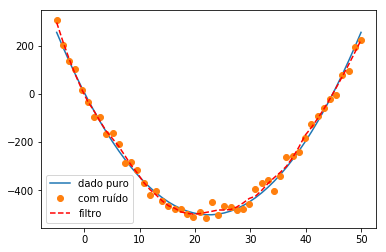

In [2]:
x = np.linspace(-5, 50)
y = x ** 2 - 45 * x + 5
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

filtro = sig.savgol_filter(yerr, 11, 2)  
# Altere o valor da janela para ver as diferenças. Tem que ser ímpar.
# Altere também o grau do filtro.

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.plot(x, filtro, 'r--', label='filtro')
plt.legend()

## Ajuste de curvas arbitrárias: curve_fit

Text(0.5,1,'Fit: a=1.0; b=-43.9; c=-7.3')

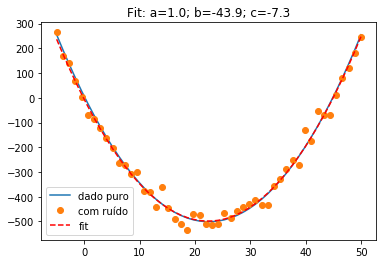

In [3]:
def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50)
y = parabola(x, 1, -45, 5)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

popt, pcov = sp.optimize.curve_fit(parabola, x, yerr, p0=(1.5, -30, 3))
# popt retorna os parâmetros do ajuste
# pcov retorna a matriz de covariâncias
# para obter as faixas de incerteza, é necessário pegar a raiz da diagonal de pcov
perr = np.sqrt(np.diag(pcov))
yfit = popt[0] * x ** 2 + popt[1] * x + popt[2]

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.plot(x, yfit, 'r--', label='fit')
plt.legend()
plt.title(f'Fit: a={popt[0]:.1f}; b={popt[1]:.1f}; c={popt[2]:.1f}')

## Junção de função de ajuste com uncertainties

Text(0.5,1,'Fit: a=0.982+/-0.015; b=-44.2+/-0.7; c=3+/-7')

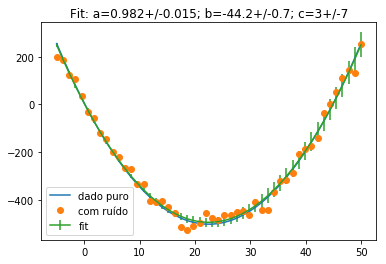

In [4]:
from uncertainties import ufloat

def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50)
y = parabola(x, 1, -45, 5)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

popt, pcov = sp.optimize.curve_fit(parabola, x, yerr, p0=(1.5, -30, 3))
# popt retorna os parâmetros do ajuste
# pcov retorna a matriz de covariâncias
# para obter as faixas de incerteza, é necessário pegar a raiz da diagonal de pcov
perr = np.sqrt(np.diag(pcov))

a = ufloat(popt[0], perr[0])
b = ufloat(popt[1], perr[1])
c = ufloat(popt[2], perr[2])

yfit = parabola(x, a, b, c) # Cria uma curva com erro propagado
yfit_vals = [i.nominal_value for i in yfit] # Separa os valores nominais dos erros
yfit_errs = [i.std_dev for i in yfit] # Separa os erros de cada ponto do ajuste

plt.plot(x, y, label='dado puro')
plt.plot(x, yerr, marker='o', linewidth=0, label='com ruído')
plt.errorbar(x, yfit_vals, yerr=yfit_errs, label='fit')
plt.legend()
plt.title(f'Fit: a={a}; b={b}; c={c}')

## Integração

Text(20,190,'$\\int_{0}^{40} -x^2 + 40x =$10667')

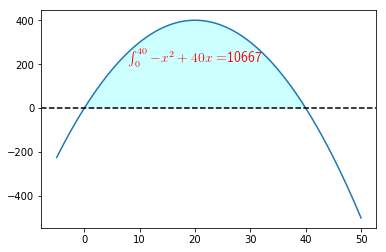

In [5]:
def parabola(x, a, b, c):
    return a * x ** 2 + b * x + c

x = np.linspace(-5, 50, 100)
y = parabola(x, -1, +40, 0)
err = np.random.normal(0,25,len(x))
# Essa função gera um erro aleatório
yerr = y + err

integração = sp.integrate.quad(parabola, 0, 40, args=(-1, 40, 0))

plt.plot(x, y)
plt.axhline(0, color='k', linestyle='--')
plt.gca().fill_between(x[y>=0], 0, y[y>=0], color='#CCFFFF')
plt.text(20, 190, r'$\int_{0}^{40} -x^2 + 40x =$' + str(round(integração[0])), color='r', 
         fontsize=14, usetex=True, horizontalalignment='center')

## Manipulação de imagens: scikit-image

Esta seção foi basicamente retirada da [apresentação](http://www.mprat.org/assets/python-instagram-filters-slides.slides.html#/1) e da [postagem](http://www.practicepython.org/blog/2016/12/20/instagram-filters-python.html) de *Michele Pratusevich*. Será utilizada uma figura diferente, mas será mostrado como criar um filtro de instagram utilizando o scikit-image e o numpy

In [6]:
# Pacotes
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import filters
import numpy as np

# Configurações do matplotlib para não mostrar os eixos junto das imagens

import matplotlib
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 0
matplotlib.rcParams['xtick.labelsize'] = 0
matplotlib.rcParams['ytick.labelsize'] = 0

In [7]:
# Importação de imagens

original_image = io.imread("./imagens/flor.jpg")   # RGB, valores entre 0-255, inteiros (uint8)
original_image = skimage.img_as_float(original_image) # Floats entre 0-1, maior gama de possibilidades

# Separação em canais

r = original_image[:, :, 0]
g = original_image[:, :, 1]
b = original_image[:, :, 2]

# Aumentar o contraste da região de vermelho utilizando interpolação.

def channel_adjust(channel, values):
    # A operação é unidimensional, então devemos garantir que tenhamos um vetor
    # mas devemos recuperar a forma da matriz original, então gravamos seu formato.
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(
        flat_channel,
        np.linspace(0, 1, len(values)),
        values)  # values são constantes praticamente arbitrárias que regem a interpolação

    # Retorna a imagem interpolada no tamanho certo.
    return adjusted.reshape(orig_size)

# Operação de interpolação afetando o canal vermelho

r_boost_lower = channel_adjust(r, [
    0, 0.05, 0.1, 0.2, 0.3,
    0.5, 0.7, 0.8, 0.9,
    0.95, 1.0])

# Deixando as cores pretas um pouco mais azuis
# Somando uma constante ao canal azul e removendo valores maiores que 1 ou menores que 0
bluer_black = np.clip(b + 0.03, 0, 1.0)

# Junção dos canais:
etapa1 = np.stack([r, g, b], axis=2)

# Sharpening e Blurring: Sharpening é basicamente a imagem original - imagem embaçada.

# Aplica um blur gaussiano. Sigma é o tamanho ao redor de cada pixel que é afetado pelo blur
# multichannel significa que afeta RGB
blurred = filters.gaussian(etapa1, sigma=10, multichannel=True)

# Remove a imagem embaçada da original. Os termos que multiplicam cada matriz regem 
# o quanto da imagem embaçada será removida. Devem somar para 1 (1.3 + (-1) = 1)
sharper = etapa1 * 1.3 - blurred * 0.3 

# A imagem pode ter valores maiores que 1 ou menores que zero, então temos que remover
# os excessos.
final = np.clip(sharper, 0, 1.0)

# Interpolando um pouco mais no azul

b_adjusted = channel_adjust(final[:,:,2], [
    0, 0.047, 0.118, 0.251, 0.318,
    0.392, 0.42, 0.439, 0.475,
    0.561, 0.58, 0.627, 0.671,
    0.733, 0.847, 0.925, 1])

final[:, :, 2] = b_adjusted

Text(0.5,1,'Mais nítida, azul ajustado')

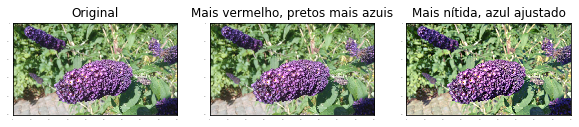

In [8]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(original_image)
ax[0].set_title('Original')
ax[1].imshow(etapa1)
ax[1].set_title('Mais vermelho, pretos mais azuis')
ax[2].imshow(final)
ax[2].set_title('Mais nítida, azul ajustado')

In [11]:
# Volta os parâmetros ao padrão
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

# lmfit

O pacote lmfit realiza ajustes de dados. Começou como uma extensão do método de Levenberg-Marquardt, utilizado pelo scipy.optimize.leastsq, mas agora faz outras coisas. [Veja o site deles para mais detalhes](https://lmfit.github.io/lmfit-py/). Eu, pessoalmente, utilizo o lmfit ao invés do curve_fit pois tenho mais controle sobre o ajuste e acho o código mais claro, apesar de ser muito mais verboso.

## Ajuste de duas curvas com o mesmo conjunto de parâmetros

In [9]:
from lmfit import minimize, Parameters, report_fit

# Definição das funções de ajuste e função de resíduo

def maxwell_elast(w, G0, lambda1):
    return G0 * (lambda1 * w) ** 2 / (1 + (lambda1 * w) ** 2)
    
def maxwell_visc(w, G0, lambda1):
    return G0 * (lambda1 * w)      / (1 + (lambda1 * w) ** 2)

def residual(params, x, datasets):
    model_elast = maxwell_elast(x, params['G0'], params['tr'])
    model_visc  = maxwell_visc (x, params['G0'], params['tr'])
    
    resid1 = datasets[0] - model_elast
    resid2 = datasets[1] - model_visc
    return np.concatenate((resid1, resid2))

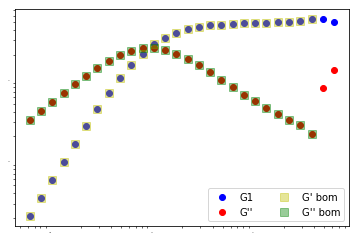

In [10]:
df = pd.read_csv('./dados-2/Reologia.txt', 
                 names=['num_exp', 'GP', 'Eta', 'w', 'G1', 'G2', 'T', 'Tau', 'lixo2'],
                 encoding='latin1',
                header=4,
                sep=';',
                decimal=',',
                na_values=' ')

OT_f = df['num_exp'].str.startswith('1')
OF_f = df['num_exp'].str.startswith('2')
CF_f = df['num_exp'].str.startswith('3')

OT = df[OT_f][['Tau', 'G1', 'G2']]
OF = df[OF_f][['w', 'G1', 'G2']]
CF = df[CF_f][['GP', 'Eta']]

# Visualização

plt.plot(OF['w'], OF['G1'], 'bo', label="G1")
plt.plot(OF['w'], OF['G2'], 'ro', label="G''")
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Remoção dos 2 pontos finais ruins. Neste exemplo, serão removidos explicitamente
# Porém, em seus conjuntos de dados, tente utilizar uma maneira genérica.
# Se for muito difícil, escolha os pontos visualmente mesmo, mas
# armazene-os de maneira fácil de ser utilizada! Por exemplo, num dicionário
# {nome da amostra:ponto final}, aí você pode chamar esse dicionário para ver
# a região que deve ser fitada
OF_bom = OF.iloc[:-2, :]

plt.plot(OF_bom['w'], OF_bom['G1'], 'ys', label="G' bom", markersize=8, alpha=0.4)
plt.plot(OF_bom['w'], OF_bom['G2'], 'gs', label="G'' bom", markersize=8, alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 52
    # variables        = 2
    chi-square         = 42.5296400
    reduced chi-square = 0.85059280
    Akaike info crit   = -6.45420870
    Bayesian info crit = -2.55172126
[[Variables]]
    G0:  49.7028810 +/- 0.25790653 (0.52%) (init = 10)
    tr:  1.01448346 +/- 0.01448141 (1.43%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(G0, tr) = -0.364


Text(0,0.5,"G', G''/Pa")

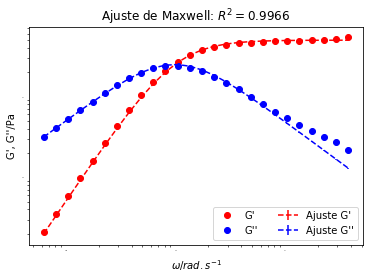

In [11]:
# Criação dos parâmetros de ajuste
params = Parameters()
params.add('G0', 10., vary=True, min=0)  # Nome, chute inicial, se o valor pode variar e seu mínimo.
params.add('tr', 1. , vary=True, min=0)

# Minimização do Chi quadrado
fit = minimize( residual, params, args=(OF_bom['w'], [OF_bom['G1'], OF_bom['G2']]) )
report_fit(fit) # Mostra um pequeno relatório do ajuste

# Plotando os resultados para observar o quão bom foi o ajuste.
# Criação dos valores de y
G0 = ufloat(fit.params['G0'].value, fit.params['G0'].stderr)
tr = ufloat(fit.params['tr'].value, fit.params['tr'].stderr)
uc_G1_novo = maxwell_elast(OF_bom['w'], G0, tr)
uc_G2_novo = maxwell_visc(OF_bom['w'], G0, tr)
G1_novo = [i.nominal_value for i in uc_G1_novo]
G2_novo = [i.nominal_value for i in uc_G2_novo]
G1_err = [i.std_dev for i in uc_G1_novo]
G2_err = [i.std_dev for i in uc_G2_novo]
# Nota: Deve ter uma maneira mais inteligente de se juntar e separar as incertezas
# dos valores no pacote uncertainties. Eu tenho que pesquisar sobre isso depois.

# Cálculo do R^2
SSres = fit.chisqr
SStot_elast = sum((OF_bom['G1'] - np.mean(OF_bom['G1'] )) ** 2)
SStot_visc = sum((OF_bom['G2']  - np.mean(OF_bom['G2'] )) ** 2)
SStot = SStot_elast + SStot_visc
R2 = 1 - SSres / SStot

# Plot da curva de ajuste
plt.plot(OF_bom['w'], OF_bom['G1'], 'ro', label="G'")
plt.plot(OF_bom['w'], OF_bom['G2'], 'bo', label="G''")
plt.errorbar(OF_bom['w'], G1_novo, G1_err, linestyle='--', color='r', label="Ajuste G'")
plt.errorbar(OF_bom['w'], G2_novo, G2_err, linestyle='--', color='b', label="Ajuste G''")
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.title(f'Ajuste de Maxwell: $R^2=${R2:.4f}')
plt.xlabel(r'$\omega/rad.s^{-1}$')
plt.ylabel("G', G''/Pa")

# Expressões regulares (regex)

Expressões regulares são padrões de texto utilizados para encontrar palavras/texto que obedecem certos critérios, pré-estabelecidos. São ferramentas extremamente úteis para a análise de textos. Podem ter utilidade menor para o tratamento de dados de origem química, mas tem utilidade em outras áreas. Eu, pessoalmente, acho elas absolutamente fascinantes.

Um exemplo da utilidade de expressões regulares. Suponha que você tenha um manuscrito. Por força de hábito, você sempre utilizou uma vírgula como separador decimal. Porém, o trabalho está em inglês, então o separador deve ser ponto. Como achar, no seu texto, todas as instâncias onde há uma vírgula separando dois algarismos, sem ter que passar por todas as vírgulas num texto? Utilize, por exemplo, a expressão ```\d,\d```. Simples. Para substituir a vírgula por ponto (por favor, cheque tudo antes), utilize parênteses para criar seções, como ```(\d),(\d)``` e substitua pelo grupo1, ponto, grupo2, ou ```\1.\2```. Simples, não?

Muitos editores de texto um pouco mais avançados possuem métodos de procura e troca de palavras que podem ser baseadas em expressões regulares. Por exemplo, Notepad++, Sublime Text, Word (um pouco diferente, mas ele possui sim) e TexStudio. Aqui, será dada uma pequeníssima introdução ao que são expressões regulares, e como utilizá-las para algumas tarefas típicas que eu encontrei durante o tratamento de dados.

## Como construir uma regex

Regexes são construídas pela junção de símbolos que acabam se referindo a um texto. O site https://regex101.com/ possui um ambiente muito bom para visualizar e testar expressões regulares. Vamos começar com uma string de teste, e vamos encontrar todos os casos que possuem um número incorreto de algarismos significativos. Suponha que esta lista tenha sido obtida após um CTRL+C CTRL+V de um conjunto de dados do excel num documento de texto, e alguns algarismos foram comidos, porque deveriam terminar em zero.

    1.9823 5.89 2.5694 4.18 5.32 
    2.6 9.71 3.117 3.4771 4.0413
    6.7576 3.6157 8.5709 7.455 0.93 
    6.68 8.6768 8.789 4.816 9.71 
    5.4556 0.1315 7.8743 2.546 9.15 
    7.88 7.164 0.3194 1.2999 8.08 
    2.13 9.01 0.288 3.068 4.151 
    6.2648 1.143 6.42 8.96 0.48 
    9.8385 1.877 1.74 7.72 1.85 
    2.6755 7.901 7.785 4.48 9.966 

Neste caso, vamos considerar o seguinte. Temos 3 algarismos significativos. Então, se começar com 0, temos que ter 3 algarismos depois da vírgula, senão, 2 algarismos. Como encontrar, sem ter que olhar um pra um? Vá para o site linkado acima e siga as seguintes instruções.

Para construir uma expressão regular, utilizamos tokens.

* Se desejamos encontrar pontualmente algum caracter, utilizamos ele sozinho, a não ser que seja especial. Logo, para encontrar somente o número 9, podemos utilizar ```9```.
* Mais abstratamente, o token para qualquer dígito (0-9) é ```\d```. 
* Para encontrar dois dígitos um do lado do outro, podemos utilizar ```\d\d```, ou também, ```\d{2}```. 
* Para encontrar qualquer número de dígitos (0 ou mais), utilizamos um ```*```
* Para encontrar 1 ou mais, utilizamos ```+```. 
* Para encontrar qualquer caracter, utilizamos ```.```
* Porém para encontrar um ponto, temos que escapar o ponto, utilizando uma barra para a esquerda, ```\.```. 
* Para encontrar um valor ou outro, utilizamos ```(valor1|valor2)```. Por exemplo, para encontrar 7 ou 14, podemos utilizar ```(7|14)```.
* Para encontrar os algarismos de 3 a 9, podemos utilizar ```[3-9]```. 
* O mesmo vale para letras. O seguinte encontra qualquer letra minúscula (sem acentos), ```[a-z]```.
* Para separar os valores encontrados em grupos, podemos utilizar parênteses, ```({grupo1})({grupo2})```.

Primeiro, vamos tentar encontrar os valores bons. Digite a seguinte expressão.

    ([0]\.\d{3}|[1-9]\.\d{2})
    
Veja que ele selecionou vários valores que não são bons, pois possuem algarismos demais. Temos, então, que garantir que não há algarismos depois do último. Isso é chamado de *negative lookahead*, cuja sintaxe é ```(?!...)```. Podemos atualizar a expressão para não considerar qualquer número que tenha 1 até 5 algarismos depois do último significativo:

    ([0]\.\d{3}|[1-9]\.\d{2})(?!\d{1,5})
    
Agora, podemos editar esses valores para tentar regularizá-los. Isso pode ser feito diminuindo o conjunto de trabalho e cortando os números em excesso ou colocando zeros nos que faltam. Vou mostrar um exemplo aqui utilizando o pacote ```re``` do python para fazer dois tipos de substituição, uma colocando um zero e outra tirando algarismos em excesso.

O pacote ```re``` pode funcionar de duas maneiras diferentes. Ou você compila a expressão regular, que se torna um objeto que pode ser chamado para fazer somente um tipo de alteração, como achar, substituir, etc, ou você pode utilizar as funções de achar, substituir diretamente do pacote, mas aí fornecendo a regex apropriada. Neste exemplo, mostraremos os dois métodos.


In [12]:
import re  # Pacote de expressões regulares interna do Python

regex_teste1 = """
1.9823 5.89 2.5694 4.18 5.32 
2.6 9.71 3.117 3.4771 4.0413
6.7576 3.6157 8.5709 7.455 0.93 
6.68 8.6768 8.789 4.816 9.71 
5.4556 0.1315 7.8743 2.546 9.15 
7.88 7.164 0.3194 1.2999 8.08 
2.13 9.01 0.288 3.068 4.151 
6.2648 1.143 6.42 8.96 0.48 
9.8385 1.877 1.74 7.72 1.85 
2.6755 7.901 7.785 4.48 9.966 
"""

# Faltando um zero
falta_1_zero = re.compile(r'([0-9]\.\d)(?!\d{1,10})')
# Temos um grupo, que pega todos os casos onde falta zeros.
print('O(s) número(s) onde falta(m) um zero é(são):', falta_1_zero.search(regex_teste1).group())
regex_teste2 = falta_1_zero.sub(r'\g<1>0', regex_teste1) # Substitui onde ocorre a falha, colocando um zero
print('String inicial consertada:\n', regex_teste2)

# 2 ou 3 algarismos em excesso
com_2_ou_3_algarismos_excesso = re.compile(r'[1-9]\.\d\d\d{1,3}')
print('O(s) número(s) onde há algarismos em excesso é(são):', 
      *com_2_ou_3_algarismos_excesso.findall(regex_teste1), sep=' ')
# Realizando a substituição
regex_teste3 = re.sub(r'([1-9]\.\d\d)\d{1,3}', r'\g<1>', regex_teste2)
print('String consertada duas vezes:\n', regex_teste3)

O(s) número(s) onde falta(m) um zero é(são): 2.6
String inicial consertada:
 
1.9823 5.89 2.5694 4.18 5.32 
2.60 9.71 3.117 3.4771 4.0413
6.7576 3.6157 8.5709 7.455 0.93 
6.68 8.6768 8.789 4.816 9.71 
5.4556 0.1315 7.8743 2.546 9.15 
7.88 7.164 0.3194 1.2999 8.08 
2.13 9.01 0.288 3.068 4.151 
6.2648 1.143 6.42 8.96 0.48 
9.8385 1.877 1.74 7.72 1.85 
2.6755 7.901 7.785 4.48 9.966 

O(s) número(s) onde há algarismos em excesso é(são): 1.9823 2.5694 3.117 3.4771 4.0413 6.7576 3.6157 8.5709 7.455 8.6768 8.789 4.816 5.4556 7.8743 2.546 7.164 1.2999 3.068 4.151 6.2648 1.143 9.8385 1.877 2.6755 7.901 7.785 9.966
String consertada duas vezes:
 
1.98 5.89 2.56 4.18 5.32 
2.60 9.71 3.11 3.47 4.04
6.75 3.61 8.57 7.45 0.93 
6.68 8.67 8.78 4.81 9.71 
5.45 0.1315 7.87 2.54 9.15 
7.88 7.16 0.3194 1.29 8.08 
2.13 9.01 0.288 3.06 4.15 
6.26 1.14 6.42 8.96 0.48 
9.83 1.87 1.74 7.72 1.85 
2.67 7.90 7.78 4.48 9.96 



Veja como conseguimos reduzir muitos dos casos errôneos. Tente criar regex para os casos restantes.

Essa seção pode ter sido um pouco esotérica, mas é bom você saber o assunto existe, caso você se depare com um problema que poderia ser resolvido por regex.

# Outras ferramentas de visualização

Eu, pessoalmente, só tenho experiência com o pyplot, e mesmo tendo utilizado por bastante tempo, sinto que eu só explorei muito pouco do que existe nesse pacote. Porém, a necessidade, ou curiosidade, precede a busca por novas ferramentas. Veja [esta palestra do Jake VanderPlas](https://www.youtube.com/watch?v=FytuB8nFHPQ) sobre o ecosistema de visualização no Python.

## Seaborn

Seaborn é um pacote de ferramentas de visualização baseados no matplotlib, da mesma maneira que o pyplot. Ela opera intimamente com o pandas. O Seaborn possui funções para realizar, dentre outros:

* Plots relacionais (`lineplot`, `scatterplot`, ou o mais geral, `relplot`). Veja os argumentos de `relplot`, e o que eles conseguem realizar:
    * `data`, `x`, `y`: os dados que serão utilizados para plotar. Logo, não precisamos criar um pandas dataframe e passar as colunas diretamente, pois podemos utilizar os nomes das colunas como os parâmetros `x` e `y`.
    * `hue`: Agrupa os dados por cor dependendo dos valores únicos da coluna especificada por `hue`.
    * `style`: Agrupa os dados por estilo de linha dependendo dos valores da coluna especificada por `style`.
    * `palette`: escolhe a paleta de cores para o agrupamento em `hue`.
    * `kind`: Linhas (`line`, equivalente a `lineplot`) ou pontos (`scatter`, equivalente a `scatterplot`).
    * `col`: subdivide o gráfico no número de valores únicos da coluna especificada.
    * `row`: idem, mas para linhas.
    * etc...
* Plots categóricos (`violinplot`, `boxplot`)
* Plots de distribuição, como histogramas (`distplot`, `kdeplot`)
* Plots de regressão (`lmplot`, `regplot`, `residplot`)
* Plots matriciais (`heatmap`)

Veja alguns exemplos de plots feitos com o seaborn, retirados da galeria deles. Caso ocorra um erro do tipo `module dos not contain XYZ`, execute o comando para atualizar o seaborn para a versão mais recente:

    pip install --upgrade seaborn

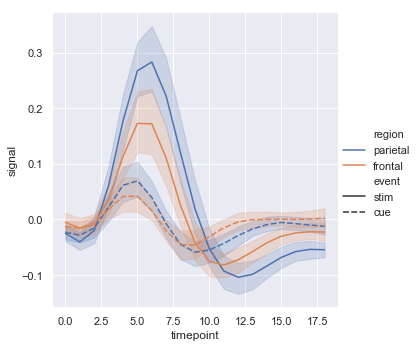

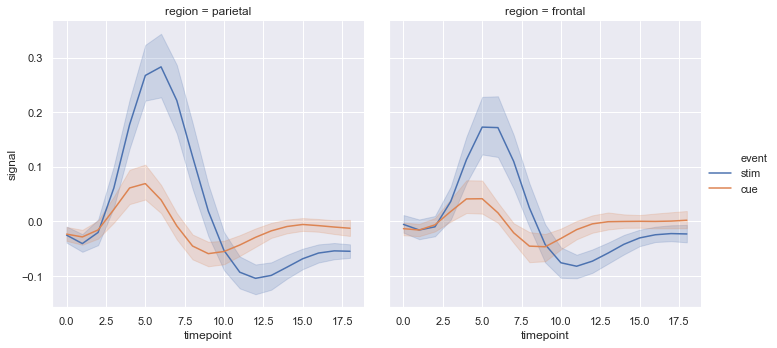

In [13]:
# Exemplo retirado da galeria de exemplos do seaborn.
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")  # Teste com darkgrid, whitegrid, dark, white, ticks

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.relplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri, kind='line')

sns.relplot(x="timepoint", y="signal",
             hue="event",
             data=fmri, kind='line', col='region')

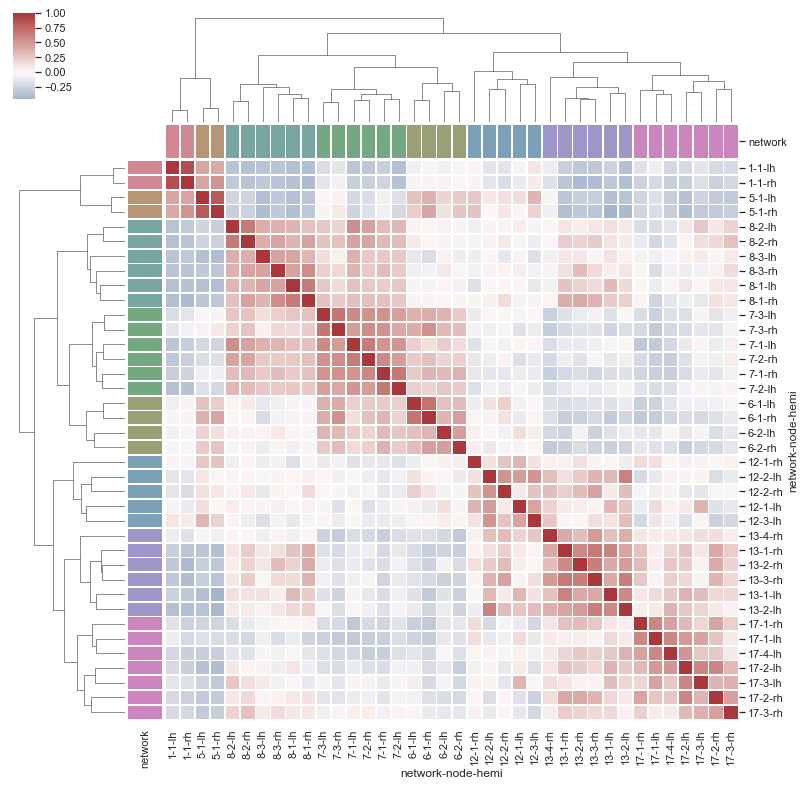

In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))


## Altair

O Altair é uma ferramenta que permite a criação de plots interativos, com uma gramática diferente e um pouco similar ao seaborn. . Ele tem preferência pelo ambiente JupyterLab, mas funciona também em notebooks. 
     
Rode os seguintes comandos para instalar o Altair

Por conda:

    conda install -c conda-forge altair vega_datasets notebook vega
    
Por pip:

    pip install -U altair vega_datasets notebook vega
    
A [seguinte palestra introduz o Altair](https://www.youtube.com/watch?v=ms29ZPUKxbU). Abaixo estão alguns exemplos.

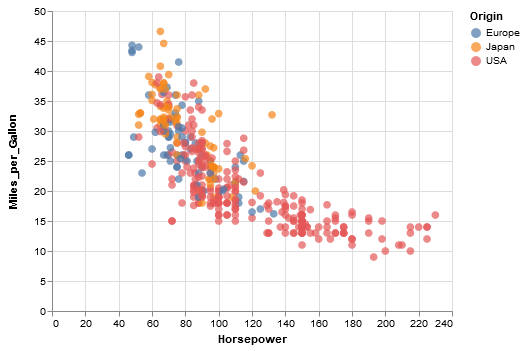

In [15]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

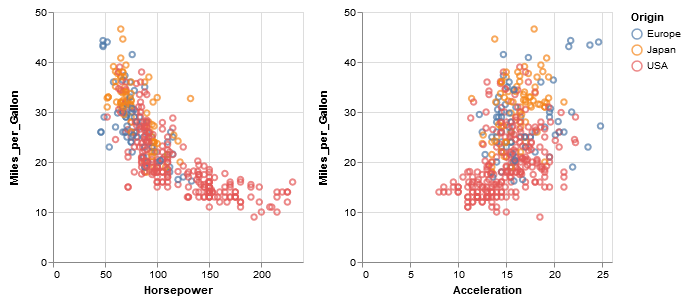

In [16]:
# Visualização de correlações interativa - clique e arraste para criar caixas de seleção

cars = data.cars()
brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(cars).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')